In [284]:
from tensorflow.keras.applications import VGG19,imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import PIL,urllib

In [285]:
model=VGG19(
    weights="imagenet",
    classifier_activation="softmax",
)

In [286]:
def from_path(path):
    img = image.load_img(path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    img=image.img_to_array(img)
    return(predict(img))

In [287]:
def from_url(url):
    img=np.array(PIL.Image.open(urllib.request.urlopen(url)))
    plt.imshow(img)
    plt.axis('off')
    img=cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
    img=cv2.resize(img,(224,224))
    return(predict(img))


In [288]:
def predict(img):
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    results=imagenet_utils.decode_predictions(features)
    return([(i[1],i[2]) for i in results[0]])

[('Leonberg', 0.70061064),
 ('Tibetan_mastiff', 0.08528707),
 ('Afghan_hound', 0.06490489),
 ('Irish_wolfhound', 0.04463346),
 ('standard_poodle', 0.04026625)]

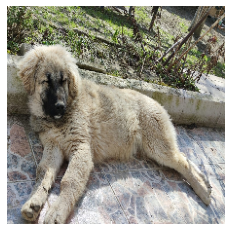

In [307]:
from_path('images/dog4.jpg')

[('mantis', 0.9304122),
 ('grasshopper', 0.025773745),
 ('walking_stick', 0.01820573),
 ('cricket', 0.008233535),
 ('leafhopper', 0.002718531)]

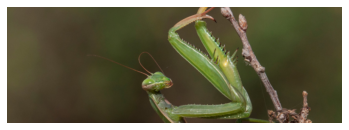

In [298]:
from_url('https://api.turkiyeyabanhayati.org/uploads/blog/detail/peygamber-devesi-hakkinda_15950598474177195.png')

[('library', 0.917308),
 ('vault', 0.037211288),
 ('dome', 0.0126265725),
 ('theater_curtain', 0.00916854),
 ('bannister', 0.005419854)]

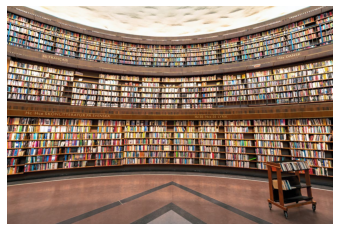

In [308]:
from_url('https://www.albawaba.com/sites/default/files/im/Turkey_2017/shutterstock_585940202.jpg?width=1200&enable=upscale')

[('lakeside', 0.47177014),
 ('geyser', 0.041932162),
 ('valley', 0.038918607),
 ('alp', 0.032326873),
 ('boathouse', 0.030375805)]

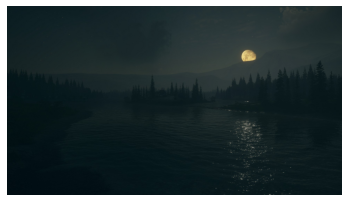

In [310]:
from_url('https://steamuserimages-a.akamaihd.net/ugc/1847041964786221025/F7388BB8E9C5B4A789D1C8442AA626402D61FF53/?imw=5000&imh=5000&ima=fit&impolicy=Letterbox&imcolor=%23000000&letterbox=false')

[('scuba_diver', 0.85579866),
 ('book_jacket', 0.011198829),
 ('ski', 0.010135469),
 ('alp', 0.008942473),
 ('cliff', 0.00884167)]

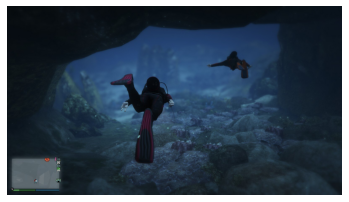

In [321]:
from_url('https://steamuserimages-a.akamaihd.net/ugc/925918561541684841/CED22DA056302154321360752CCE04A1FEBB880E/?imw=5000&imh=5000&ima=fit&impolicy=Letterbox&imcolor=%23000000&letterbox=false')